## Email span detection using Convolutional Neural Networks(CNN) with Sequential API 


# Variation 2. CNN with GlobalMaxPooling1D and Additional Dense Layer with Dropout


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop


### STEP 0: Preprocessing Data

In [31]:

#Load the dataset
data = pd.read_csv('test_data.csv')

# Convert text in 'message' column to lowercase
data['Message'] = data['Message'].apply(lambda x: x.lower())


### STEP 1: Data Splitting

In [32]:

#LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#Assign 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=30)


print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (4457,), Training labels shape: (4457,)
Test data shape: (1115,), Test labels shape: (1115,)


### STEP 2: Model Architecture Design

In [33]:
# Tokenize the text data
maximum_words_to_consider = 1000 # This variable determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=maximum_words_to_consider) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored.
tokenizer.fit_on_texts(X_train)

# Convert training and testing text data to sequences using the tokenizer
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Set the maximum sequence length
maximum_sequence_length = 100

# Pad the sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=maximum_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maximum_sequence_length)

# Define parameters for the embedding layer
embedding_dimension = 50

# Define parameters for the convolutional layer
number_of_filters = 64
filter_kernel_size = 5

# Build the sequential model
model = Sequential([
    # Embedding Layer
    Embedding(input_dim=maximum_words_to_consider, output_dim=embedding_dimension, input_length=maximum_sequence_length),
    # Convolutional Layer 1 -- padding="same" means input and output have same spatial dimension
    Conv1D(filters=number_of_filters, kernel_size=filter_kernel_size, padding='same', activation='relu'),
    # Max Pooling Layer 1
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output Layer
    Dense(1, activation='sigmoid')
])


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### STEP 3: Model Compilation

In [34]:


# Compiles the model with the Adam optimizer, binary crossentropy loss function, and accuracy metric.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])


### STEP 4: Model Training

In [35]:
 # Define the number of epochs (iterations over the entire dataset) for training the model
number_of_epochs = 5
batch_size = 64

# Fit the model to the training data, specifying batch size, number of epochs, and validation data
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=number_of_epochs, validation_data=(X_test_padded, y_test))



Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8027 - loss: 0.5158 - val_accuracy: 0.8780 - val_loss: 0.3028
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9116 - loss: 0.2089 - val_accuracy: 0.9865 - val_loss: 0.0475
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9908 - loss: 0.0463 - val_accuracy: 0.9865 - val_loss: 0.0417
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9933 - loss: 0.0276 - val_accuracy: 0.9830 - val_loss: 0.0483
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.9803 - val_loss: 0.0568


In [36]:
import matplotlib.pyplot as plt

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


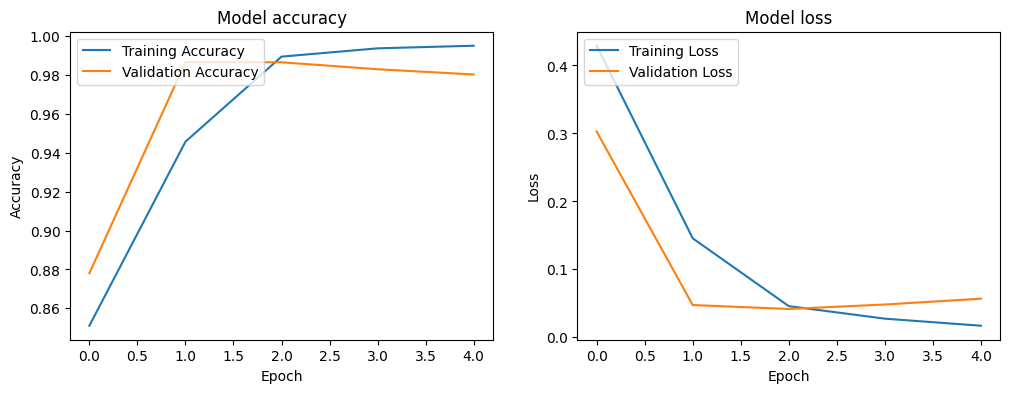

In [37]:
def plot_model_history(history):
    # values to plot
    #  loss: loss value for training data
    #  accuracy: accuracy value for training data
    #  val_loss: loss value for validation data
    #  val_accuracy: accuracy value for validation data
    print(history.history.keys())

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
    plt.show()

plot_model_history(history)

## Predict Single Input

In [38]:
# spam or ham prediction
def predict_spam_or_ham(message):
    # Tokenize and pad the input message
    message_sequences = tokenizer.texts_to_sequences([message])
    message_padded = pad_sequences(message_sequences, maxlen=maximum_sequence_length)
    
    # Make predictions
    prediction = model.predict(message_padded)
    
    print(prediction)
    # Convert prediction to label (0 for ham, 1 for spam)
    label = "spam" if prediction[0][0] > 0.5 else "ham"
    
    return label


In [39]:

# Example message
example_message = "Congratulations! You've won a free trip to Hawaii. Claim your prize now!"

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.99970824]]
Predicted Label: spam


In [40]:

# Example message
example_message = "This email provides relevant information about an upcoming programming workshop and encourages the recipient to RSVP if interested. It does not contain any elements typically associated with spam, such as unsolicited offers, suspicious links, or irrelevant content."

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.20281793]]
Predicted Label: ham


# Performance Analysis

## Model Evaluation

1. **Accuracy**: Measure the overall accuracy of the model on the test dataset.


In [41]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0668
Test Accuracy: 0.9802690744400024


2. **Precision**: Evaluate how many of the predicted positives are actual positives.


In [42]:

from sklearn.metrics import precision_score

In [43]:

# Predict probabilities ( the output is in probability, bacuse we use a sigmoid activation function in the final layer of your neural network, which outputs probabilities between 0 and 1.)
y_pred_prob = model.predict(X_test_padded)


#note that common threshold value is 0.5
# Convert probabilities to binary class labels
y_pred = (y_pred_prob > 0.5).astype(int)


# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.91


3. **Recall**: Determine how many of the actual positives are correctly identified by the model.


In [44]:
from sklearn.metrics import recall_score


In [45]:

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.93


4. **F1 Score**: Calculate the harmonic mean of precision and recall to get a single performance metric.


In [46]:
from sklearn.metrics import f1_score


In [47]:

# Assuming y_true and y_pred are the true labels and predicted labels, respectively
f1 = f1_score(y_pred, y_pred)
# Calculate F1 score
print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


5. **ROC Curve**: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
The Area Under the ROC Curve (AUC-ROC) quantifies the performance of the model across all possible classification thresholds. A higher AUC-ROC value indicates better discrimination between spam and non-spam classes.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


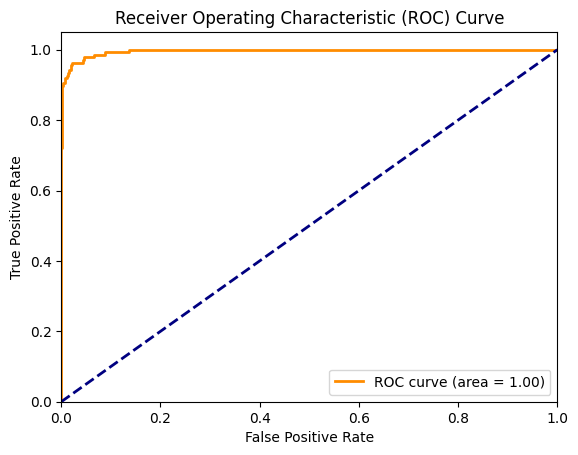

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 9: Make predictions on the test set
predicted_probabilities = model.predict(X_test_padded)

# Step 10: Compute ROC curve and AUC-ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probabilities)
roc_area_under_curve = auc(false_positive_rate, true_positive_rate)

# Step 11: Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


6. **Confusion Matrix**: Analyze the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.


In [49]:
from sklearn.metrics import confusion_matrix


In [50]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[966  13]
 [  9 127]]


plot confusion matrix

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

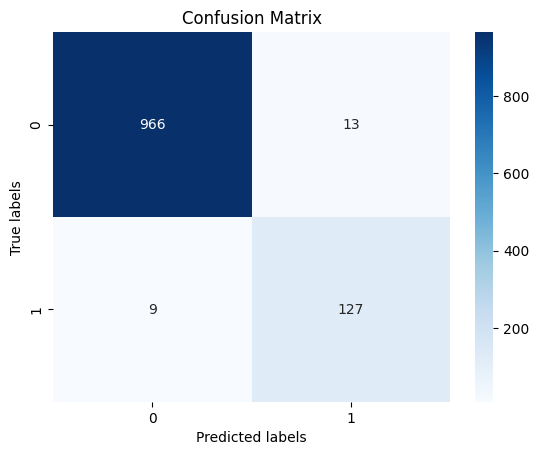

In [52]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Resource Utilization


1. **Training Time**: Measure the time taken to train the model.

In [53]:
import time

In [54]:

# Measure the training time
start_time = time.time()

# Train the model
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=number_of_epochs, validation_data=(X_test_padded, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9974 - loss: 0.0127 - val_accuracy: 0.9821 - val_loss: 0.0644
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9992 - loss: 0.0057 - val_accuracy: 0.9812 - val_loss: 0.0677
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9812 - val_loss: 0.0742
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9812 - val_loss: 0.0799
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9794 - val_loss: 0.0829
Training time: 3.36 seconds


2. **Inference Time**: Check the time taken for the model to make predictions.


In [55]:

# Measure inference time
start_time = time.time()
y_pred_prob = model.predict(X_test_padded)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference Time: {inference_time:.4f} seconds')


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Inference Time: 0.1671 seconds



## Hyperparameter Tuning


1. **Learning Rate**: Optimize and analyze the effect of different learning rates.

In [56]:
# Prepare the data for training and testing

# Initialize a label encoder to convert categorical labels to numerical labels
label_encoder = LabelEncoder()

# Transform the 'Category' column in the data DataFrame to numerical labels
data['Category'] = label_encoder.fit_transform(data['Category'])

# Split the data into training and testing sets
messages_train, messages_test, category_train, category_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Define the maximum number of words to consider for tokenization
maximum_words_to_consider = 1000 

# Initialize a tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words=maximum_words_to_consider) 
tokenizer.fit_on_texts(messages_train)

# Convert the text data to sequences of numerical values
X_train_seq = tokenizer.texts_to_sequences(messages_train)
X_test_seq = tokenizer.texts_to_sequences(messages_test)

# Set a maximum sequence length for padding
maximum_sequence_length = 100

# Pad the sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_seq, maxlen=maximum_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=maximum_sequence_length)

# Define parameters for the CNN model
embedding_dimension = 50
number_of_filters = 64
filter_kernel_size = 5

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 0.3]

# Iterate over different learning rates
for lr in learning_rates:
    # Define the CNN model architecture
    model = Sequential([
        Embedding(input_dim=maximum_words_to_consider, output_dim=embedding_dimension, input_length=maximum_sequence_length),   
        Conv1D(filters=number_of_filters, kernel_size=filter_kernel_size, padding='same', activation='relu'),
        GlobalMaxPooling1D(), 
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=lr)
    
    # Train the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define the number of epochs for training.
    epochs = 5
    
    # Train the model on the training data.
    history = model.fit(X_train_padded, category_train, epochs=epochs, validation_data=(X_test_padded, category_test))
    
    # Predict probabilities on the test data.
    y_pred_prob = model.predict(X_test_padded)
    
    # Convert probabilities to binary class labels.
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate precision score.
    precision = precision_score(category_test, y_pred)
    
    # Evaluate the model on test data and get loss and accuracy.
    loss, accuracy = model.evaluate(X_test_padded, category_test, verbose=0)
    
    print(f"Accuracy with learning rate {lr}: {accuracy:.4f}")
    print(f"Precision with learning rate {lr}: {precision:.4f}")
    print("-----------------------------------")


Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8450 - loss: 0.4440 - val_accuracy: 0.9704 - val_loss: 0.1211
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9801 - loss: 0.0975 - val_accuracy: 0.9901 - val_loss: 0.0437
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9920 - loss: 0.0294 - val_accuracy: 0.9874 - val_loss: 0.0415
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9967 - loss: 0.0155 - val_accuracy: 0.9874 - val_loss: 0.0451
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 0.9874 - val_loss: 0.0506
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy with learning rate 0.001: 0.9874
Precision with learning rate 0.001: 0.9655
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8708 - loss: 0.2981 - val_accuracy: 0.9865 - val_loss: 0.0541
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9901 - loss: 0.0425 - val_accuracy: 0.9830 - val_loss: 0.0577
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9946 - loss: 0.0256 - val_accuracy: 0.9830 - val_loss: 0.0706
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9969 - loss: 0.0141 - val_accuracy: 0.9785 - val_loss: 0.1320
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9944 - loss: 0.0157 - val_accuracy: 0.9812 - val_loss: 0.1878
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy with learning rate 0.01: 0.9812
Precision with learning rate 0.01: 1.0000
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8042 - loss: 0.8262 - val_accuracy: 0.8664 - val_loss: 0.3978
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8713 - loss: 0.3872 - val_accuracy: 0.8664 - val_loss: 0.3952
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8605 - loss: 0.4043 - val_accuracy: 0.8664 - val_loss: 0.3943
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8615 - loss: 0.4032 - val_accuracy: 0.8664 - val_loss: 0.3945
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8681 - loss: 0.3908 - val_accuracy: 0.8664 - val_loss: 0.4024
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy with learning rate 0.1: 0.8664
Precision with learning rate 0.1: 0.0000
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7792 - loss: 28.9192 - val_accuracy: 0.8637 - val_loss: 0.6581
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8683 - loss: 0.4605 - val_accuracy: 0.8664 - val_loss: 0.3996
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8629 - loss: 0.4030 - val_accuracy: 0.8664 - val_loss: 0.3950
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8689 - loss: 0.3911 - val_accuracy: 0.8664 - val_loss: 0.3938
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8675 - loss: 0.3967 - val_accuracy: 0.8664 - val_loss: 0.3934
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy with learning rate 0.3: 0.8664
Precision with learning rate 0.3: 0.0000
-----------------------------------


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2. **Batch Size**: Experiment with different batch sizes to find the optimal one.
    

In [57]:
# Initialize a new instance of the LabelEncoder class to convert categorical labels into numerical labels.
label_encoder = LabelEncoder()

# Assign transformed numerical labels back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])

# Split the dataset into training and testing sets.
messages_train, messages_test, categories_train, categories_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Define the maximum number of unique words to consider in the tokenizer.
maximum_words_to_consider = 1000 

# Instantiate a Tokenizer object from Keras for tokenizing text data.
tokenizer = Tokenizer(num_words=maximum_words_to_consider) 

# Fit the tokenizer on the training data.
tokenizer.fit_on_texts(messages_train)

# Convert text data to sequences.
X_train_sequences = tokenizer.texts_to_sequences(messages_train)
X_test_sequences = tokenizer.texts_to_sequences(messages_test)

# Define the maximum sequence length for padding.
maximum_sequence_length = 100

# Pad sequences to ensure uniform length.
X_train_padded = pad_sequences(X_train_sequences, maxlen=maximum_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maximum_sequence_length)

# Define the embedding dimension, number of filters, and filter size for the CNN model.
embedding_dimension = 50
number_of_filters = 64
filter_kernel_size = 5

# Define a list of batch sizes to experiment with.
batch_sizes = [16, 32, 64, 128]

# Iterate over different batch sizes.
for batch_size in batch_sizes:
    # Define the CNN model architecture using the Keras Sequential API.
    model = Sequential([
        Embedding(input_dim=maximum_words_to_consider, output_dim=embedding_dimension, input_length=maximum_sequence_length),   # Embedding Layer
        Conv1D(filters=number_of_filters, kernel_size=filter_kernel_size, padding='same', activation='relu'),    # Convolutional Layer 1
        GlobalMaxPooling1D(), # Max Pooling Layer 1
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid') # Output Layer
    ])
    
    # Compile the model with binary crossentropy loss and Adam optimizer.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define the number of epochs for training.
    epochs = 5
    
    # Train the model on the training data with the current batch size.
    history = model.fit(X_train_padded, categories_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, categories_test))
    
    # Predict probabilities on the test data.
    predicted_probabilities = model.predict(X_test_padded)
    
    # Convert probabilities to binary class labels.
    predicted_labels = (predicted_probabilities > 0.5).astype(int)
    
    # Calculate precision score.
    precision = precision_score(categories_test, predicted_labels)
    
    # Evaluate the model on test data and get loss and accuracy.
    loss, accuracy = model.evaluate(X_test_padded, categories_test, verbose=0)
    
    # Print precision and accuracy for the current batch size.
    print(f'Precision with batch size {batch_size}: {precision:.2f}')
    print(f"Accuracy with batch size {batch_size}: {accuracy:.4f}")
    print("-----------------------------------")


Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8652 - loss: 0.3992 - val_accuracy: 0.9848 - val_loss: 0.0577
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - loss: 0.0502 - val_accuracy: 0.9883 - val_loss: 0.0447
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9945 - loss: 0.0209 - val_accuracy: 0.9883 - val_loss: 0.0472
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9974 - loss: 0.0119 - val_accuracy: 0.9892 - val_loss: 0.0609
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0046 - val_accuracy: 0.9865 - val_loss: 0.0587
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with batch size 16: 0.97
Accuracy with batch size 16: 0.9865
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8637 - loss: 0.4380 - val_accuracy: 0.9731 - val_loss: 0.1337
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9822 - loss: 0.0835 - val_accuracy: 0.9883 - val_loss: 0.0510
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9950 - loss: 0.0274 - val_accuracy: 0.9821 - val_loss: 0.0531
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9978 - loss: 0.0116 - val_accuracy: 0.9857 - val_loss: 0.0504
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - loss: 0.0056 - val_accuracy: 0.9874 - val_loss: 0.0575
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision with batch size 32: 0.97
Accuracy with batch size 32: 0.9874
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8305 - loss: 0.5017 - val_accuracy: 0.8664 - val_loss: 0.3069
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9109 - loss: 0.2087 - val_accuracy: 0.9865 - val_loss: 0.0590
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9863 - loss: 0.0538 - val_accuracy: 0.9865 - val_loss: 0.0472
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9940 - loss: 0.0231 - val_accuracy: 0.9883 - val_loss: 0.0512
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9968 - loss: 0.0177 - val_accuracy: 0.9839 - val_loss: 0.0521
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with batch size 64: 0.93
Accuracy with batch size 64: 0.9839
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7788 - loss: 0.5579 - val_accuracy: 0.8664 - val_loss: 0.3882
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8596 - loss: 0.3918 - val_accuracy: 0.8664 - val_loss: 0.2777
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8911 - loss: 0.2249 - val_accuracy: 0.9794 - val_loss: 0.0840
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9852 - loss: 0.0675 - val_accuracy: 0.9883 - val_loss: 0.0519
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9912 - loss: 0.0321 - val_accuracy: 0.9883 - val_loss: 0.0487
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with batch size 128: 0.97
Accuracy with batch size 128: 0.9883
-----------------------------------


3. **Optimizer Choice**: Compare the performance of different optimizers (SGD, Adam, RMSprop, etc.).


In [58]:
# Initialize a LabelEncoder to convert categorical labels into numerical labels
label_encoder = LabelEncoder()

# Transform categorical labels into numerical labels and assign them back to the 'Category' column
data['Category'] = label_encoder.fit_transform(data['Category'])

# Split the dataset into training and testing sets
training_data, testing_data, training_labels, testing_labels = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Tokenize the text data
maximum_words_to_consider = 1000  # Maximum number of unique words to consider in the tokenizer
tokenizer = Tokenizer(num_words=maximum_words_to_consider)  # Initialize a tokenizer with a maximum number of words
tokenizer.fit_on_texts(training_data)  # Fit the tokenizer on the training data
training_data_sequences = tokenizer.texts_to_sequences(training_data)  # Convert training text data to sequences
testing_data_sequences = tokenizer.texts_to_sequences(testing_data)  # Convert testing text data to sequences

# Pad sequences to ensure uniform length
maximum_sequence_length = 100  # Maximum length of sequences
padded_training_data = pad_sequences(training_data_sequences, maxlen=maximum_sequence_length)  # Pad training sequences
padded_testing_data = pad_sequences(testing_data_sequences, maxlen=maximum_sequence_length)  # Pad testing sequences

# Build the CNN model
embedding_dimension = 50  # Dimensionality of word embeddings
number_of_filters = 64  # Number of filters in the convolutional layer
filter_kernel_size = 5  # Size of the convolutional filters

# List of optimizers to compare
optimizers = [SGD(), Adam(), RMSprop()]

# Iterate over each optimizer
for optimizer in optimizers:
    # Define the CNN model architecture
    model = Sequential([
        Embedding(input_dim=maximum_words_to_consider, output_dim=embedding_dimension, input_length=maximum_sequence_length),   # Embedding Layer
        Conv1D(filters=number_of_filters, kernel_size=filter_kernel_size, padding='same', activation='relu'),    # Convolutional Layer
        GlobalMaxPooling1D(),  # Max Pooling Layer
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output Layer
    ])

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    epochs = 5  # Number of epochs for training
    history = model.fit(padded_training_data, training_labels, batch_size=batch_size, epochs=epochs, validation_data=(padded_testing_data, testing_labels))

    # Predict probabilities
    y_pred_prob = model.predict(padded_testing_data)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(testing_labels, y_pred, zero_division=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(padded_testing_data, testing_labels, verbose=0)

    # Print precision and accuracy for the current optimizer
    print(f'Precision with Optimizer {optimizer.__class__.__name__}: {precision:.2f}')
    print(f"Accuracy with Optimizer {optimizer.__class__.__name__}: {accuracy:.4f}")


Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7072 - loss: 0.6732 - val_accuracy: 0.8664 - val_loss: 0.6104
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8769 - loss: 0.5906 - val_accuracy: 0.8664 - val_loss: 0.5482
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8698 - loss: 0.5339 - val_accuracy: 0.8664 - val_loss: 0.4997
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8666 - loss: 0.4923 - val_accuracy: 0.8664 - val_loss: 0.4648
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8669 - loss: 0.4602 - val_accuracy: 0.8664 - val_loss: 0.4402
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Optimizer SGD: 1.00
Accuracy with Optimizer SGD: 0.8664
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7958 - loss: 0.5515 - val_accuracy: 0.8664 - val_loss: 0.3820
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8624 - loss: 0.3767 - val_accuracy: 0.8789 - val_loss: 0.2017
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9438 - loss: 0.1447 - val_accuracy: 0.9848 - val_loss: 0.0575
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9918 - loss: 0.0339 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9927 - loss: 0.0264 - val_accuracy: 0.9892 - val_loss: 0.0456
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Precision with Optimizer Adam: 0.97
Accuracy with Optimizer Adam: 0.9892
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7951 - loss: 0.4924 - val_accuracy: 0.8664 - val_loss: 0.3420
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8861 - loss: 0.2812 - val_accuracy: 0.9713 - val_loss: 0.1163
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9750 - loss: 0.0981 - val_accuracy: 0.9830 - val_loss: 0.0624
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9841 - loss: 0.0529 - val_accuracy: 0.9857 - val_loss: 0.0527
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9892 - loss: 0.0369 - val_accuracy: 0.9865 - val_loss: 0.0473
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Optimizer RMSprop: 0.96
Accuracy with Optimizer RMSprop: 0.9865


4. ***DIfferent Activation Functions***

In [59]:
# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

# Split data into training and testing sets
messages_train, messages_test, categories_train, categories_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Tokenize the text data
maximum_words_to_consider = 1000
tokenizer = Tokenizer(num_words=maximum_words_to_consider)
tokenizer.fit_on_texts(messages_train)
messages_train_sequences = tokenizer.texts_to_sequences(messages_train)
messages_test_sequences = tokenizer.texts_to_sequences(messages_test)

# Pad sequences to ensure uniform length
maximum_sequence_length = 100
messages_train_padded = pad_sequences(messages_train_sequences, maxlen=maximum_sequence_length)
messages_test_padded = pad_sequences(messages_test_sequences, maxlen=maximum_sequence_length)

# Set parameters for the CNN model
embedding_dimension = 50
number_of_filters = 64
filter_kernel_size = 5
batch_size = 64

# Test different activation functions for the CNN model
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu']
for activation in activation_functions:
    # Define the CNN model architecture
    model = Sequential([
        Embedding(input_dim=maximum_words_to_consider, output_dim=embedding_dimension, input_length=maximum_sequence_length),   
        Conv1D(filters=number_of_filters, kernel_size=filter_kernel_size, padding='same', activation=activation),    
        GlobalMaxPooling1D(), 
        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(1, activation='sigmoid') 
    ])
    
    # Compile the model
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    epochs = 5
    history = model.fit(messages_train_padded, categories_train, batch_size=batch_size, epochs=epochs, validation_data=(messages_test_padded, categories_test))
    
    # Predict probabilities
    y_pred_prob = model.predict(messages_test_padded)
    
    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate precision
    precision = precision_score(categories_test, y_pred)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(messages_test_padded, categories_test, verbose=0)
    
    # Print precision and accuracy for each activation function
    print(f'Precision with Activation: {activation}: {precision:.2f}')
    print(f"Accuracy with Activation: {activation}: {accuracy:.4f}")


Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8254 - loss: 0.5038 - val_accuracy: 0.8664 - val_loss: 0.3007
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9013 - loss: 0.2156 - val_accuracy: 0.9874 - val_loss: 0.0530
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9899 - loss: 0.0379 - val_accuracy: 0.9892 - val_loss: 0.0475
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9955 - loss: 0.0227 - val_accuracy: 0.9883 - val_loss: 0.0469
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9857 - val_loss: 0.0519
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Activation: relu: 0.95
Accuracy with Activation: relu: 0.9857
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8708 - loss: 0.4541 - val_accuracy: 0.8664 - val_loss: 0.2536
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9253 - loss: 0.1656 - val_accuracy: 0.9857 - val_loss: 0.0568
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9913 - loss: 0.0308 - val_accuracy: 0.9901 - val_loss: 0.0431
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9951 - loss: 0.0189 - val_accuracy: 0.9883 - val_loss: 0.0461
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9975 - loss: 0.0104 - val_accuracy: 0.9865 - val_loss: 0.0530
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Activation: tanh: 0.95
Accuracy with Activation: tanh: 0.9865
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7461 - loss: 0.5418 - val_accuracy: 0.8664 - val_loss: 0.3892
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8714 - loss: 0.4001 - val_accuracy: 0.8664 - val_loss: 0.3410
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8593 - loss: 0.3502 - val_accuracy: 0.9130 - val_loss: 0.2065
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9332 - loss: 0.1969 - val_accuracy: 0.9596 - val_loss: 0.1287
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9633 - loss: 0.1245 - val_accuracy: 0.9704 - val_loss: 0.1014
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Activation: sigmoid: 0.97
Accuracy with Activation: sigmoid: 0.9704
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8243 - loss: 0.4782 - val_accuracy: 0.8664 - val_loss: 0.3036
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9148 - loss: 0.2024 - val_accuracy: 0.9883 - val_loss: 0.0591
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9886 - loss: 0.0343 - val_accuracy: 0.9883 - val_loss: 0.0457
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9935 - loss: 0.0226 - val_accuracy: 0.9874 - val_loss: 0.0445
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9976 - loss: 0.0109 - val_accuracy: 0.9883 - val_loss: 0.0471
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with Activation: elu: 0.97
Accuracy with Activation: elu: 0.9883
